# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [362]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [9]:
pd.__version__

'1.0.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [10]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [11]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [12]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [13]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [14]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [15]:
release_dates.head(10)

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
5,#Horror,2015,USA,2015-11-20
6,#Horror,2015,UK,2016-05-16
7,#Lucky Number,2015,USA,2015-09-01
8,#Nerealnaya lyubov,2014,Russia,2014-02-13
9,#Pellichoopulu,2016,India,2016-07-29


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [16]:
len(movies) # with duplication

244914

In [17]:
# we should be counting the unique titles.. 
len(movies.title.unique())

223828

### List all Batman movies ever made

In [18]:
# strictly find Batman movies
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
#batman_df.shape
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [19]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [20]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [21]:
harry_df = movies[movies.title.str.contains('harry potter', case=False)]
harry_df.sort_values(by=['year'], ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [22]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [23]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [24]:
len(movies[(2018 <= movies.year) | (movies.year >= 2000)])

115471

### Section I - Q4: How many movies are titled "Hamlet"?

In [25]:
#len(movies[movies.title.str.contains('Hamlet', case=False)]) # contains Hamlet
len(movies[movies.title == 'Hamlet']) #titled Hamlet

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [26]:
hamlet_2000 = movies[(movies.title == 'Hamlet') & (movies.year > 2000)] #titled Hamlet
hamlet_2000

,title,year
1931,Hamlet,2009
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
227953,Hamlet,2011
244747,Hamlet,2017


In [27]:
hamlet_2000.sort_values(by=['year'], ascending=True)

,title,year
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [28]:
incep_roles = cast[cast.title == 'Inception']
incep_support = incep_roles[incep_roles.n.isnull()]
print(f"{len(incep_support)} out of {len(incep_roles)} roles in the movie 'Inception' are of the supporting cast")

27 out of 78 roles in the movie 'Inception' are of the supporting cast


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [29]:
incep_main_char = incep_roles[incep_roles.n.notnull()]
print(f"{len(incep_main_char)} out of {len(incep_roles)} roles in the movie 'Inception' are of the main cast")

51 out of 78 roles in the movie 'Inception' are of the main cast


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [30]:
incep_main_char.sort_values(by=['n'], ascending=True).iloc[:10]

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [31]:
# A)
char_albus = cast[cast.character == 'Albus Dumbledore']
char_albus

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


In [32]:
# B) we should take the unique names that played Albus Dumbledore character
list(char_albus.name.unique())

['Dane Farwell',
 'Michael Gambon',
 'Richard Harris',
 "George (X) O'Connor",
 'Timothy Tedmanson']

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [33]:
# A)
Keanu_roles = cast[cast.name == 'Keanu Reeves']
print(f"Keanu Reeves has played {len(Keanu_roles)} roles thought his career")

Keanu Reeves has played 62 roles thought his career


In [34]:
# B) 
roles_after_1999 = Keanu_roles[Keanu_roles.year > 1999]

# leadering role is ambiguous, does it mean main roles and not supporting roles? if so then we need to exclude NaN.
#roles_after_1999_exec_NaN = roles_after_1999[roles_after_1999.n.notnull()]
#roles_after_1999_exec_NaN.sort_values(by=['year','n'], ascending=True)

# or we can assue leading (or important) role only means when n is small as follows
#roles_after_1999.sort_values(by=['year','n'], ascending=True)

# or we can assume leading role is when n=1 as follows:
roles_after_1999_n1 = roles_after_1999[roles_after_1999.n == 1]
roles_after_1999_n1.sort_values(by=['year'])

,title,year,name,type,character,n
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0
1892361,John Wick,2014,Keanu Reeves,actor,John Wick,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [35]:
# A)
roles_1950_1960 = cast[(cast.year >= 1950) & (cast.year <= 1960)]
roles_1950_1960.groupby(by=['type']).count()[['n']]

,n
type,
actor,90447
actress,39761


In [36]:
# B) 
roles_2007_2017 = cast[(cast.year >= 2007) & (cast.year <= 2017)]
roles_2007_2017.groupby(by=['type']).count()[['n']]

,n
type,
actor,465728
actress,270635


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [206]:
# A) assume leading role is when n=1
leading_roles_2000_now = cast[(cast.n == 1) & (cast.year >= 2000)]
print(f"Total number of leading roles available from 2000 to present is {leading_roles_2000_now.shape[0]}")

Total number of leading roles available from 2000 to present is 60568


In [37]:
# B) cast.n > 1 will execlude NaN
non_leading_roles_2000_now = cast[(cast.n > 1) & (cast.year >= 2000)]
print(f"Total number of non-leading roles available from 2000 to present is {non_leading_roles_2000_now.shape[0]}")

Total number of non-leading roles available from 2000 to present is 1001710


In [38]:
# C)
support_roles_2000_now = cast[(cast.n.isnull()) & (cast.year >= 2000)]
print(f"Total number of support roles available from 2000 to present is {support_roles_2000_now.shape[0]}")

Total number of support roles available from 2000 to present is 887484


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [39]:
top_ten = movies.title.value_counts()[:10]
print('top ten movies with their fequency:')
top_ten

top ten movies with their fequency:


Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
The Outsider            12
Maya                    12
Othello                 11
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

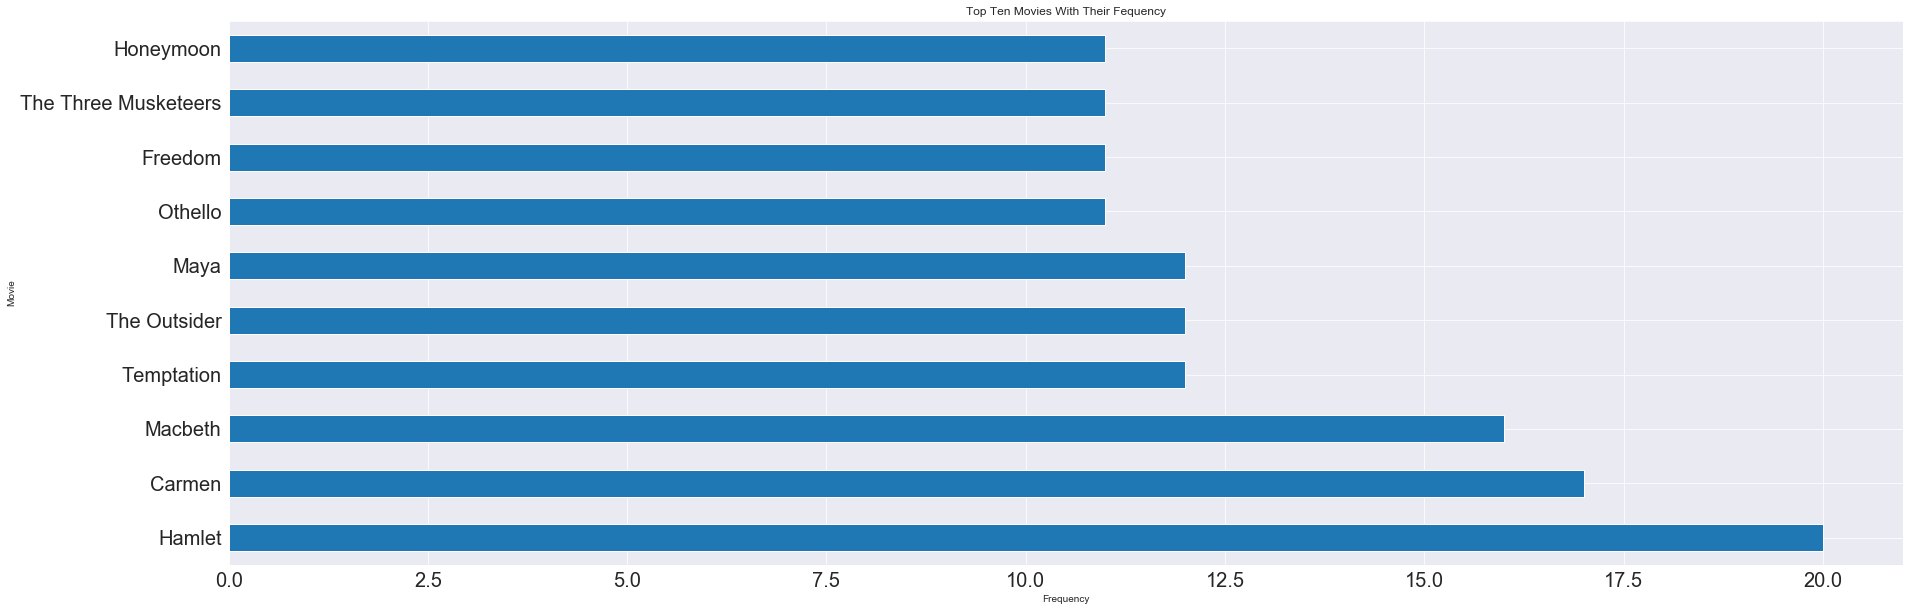

In [360]:
plt.title('Top Ten Movies With Their Fequency')
top_ten.plot(kind='barh', figsize=(30,10), fontsize=20)
plt.xlabel('Frequency')
plt.ylabel('Movie');

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [223]:
release_dates_after_2000 = release_dates[release_dates.year >= 2000]
release_dates_after_2000.year.value_counts().iloc[:3]
#release_dates_after_2000.plot(kind='barh')

2016    17548
2014    17519
2015    16639
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [282]:
# groupby decades
df_decade = release_dates.copy()
total_films_by_decade = df_decade.groupby((df_decade.date.dt.year//10)*10).size()
total_films_by_decade

date
1890         1
1900        13
1910      5559
1920     13066
1930     22623
1940     21810
1950     33239
1960     32257
1970     31481
1980     37030
1990     50481
2000    101078
2010    130743
2020       106
2110         1
dtype: int64

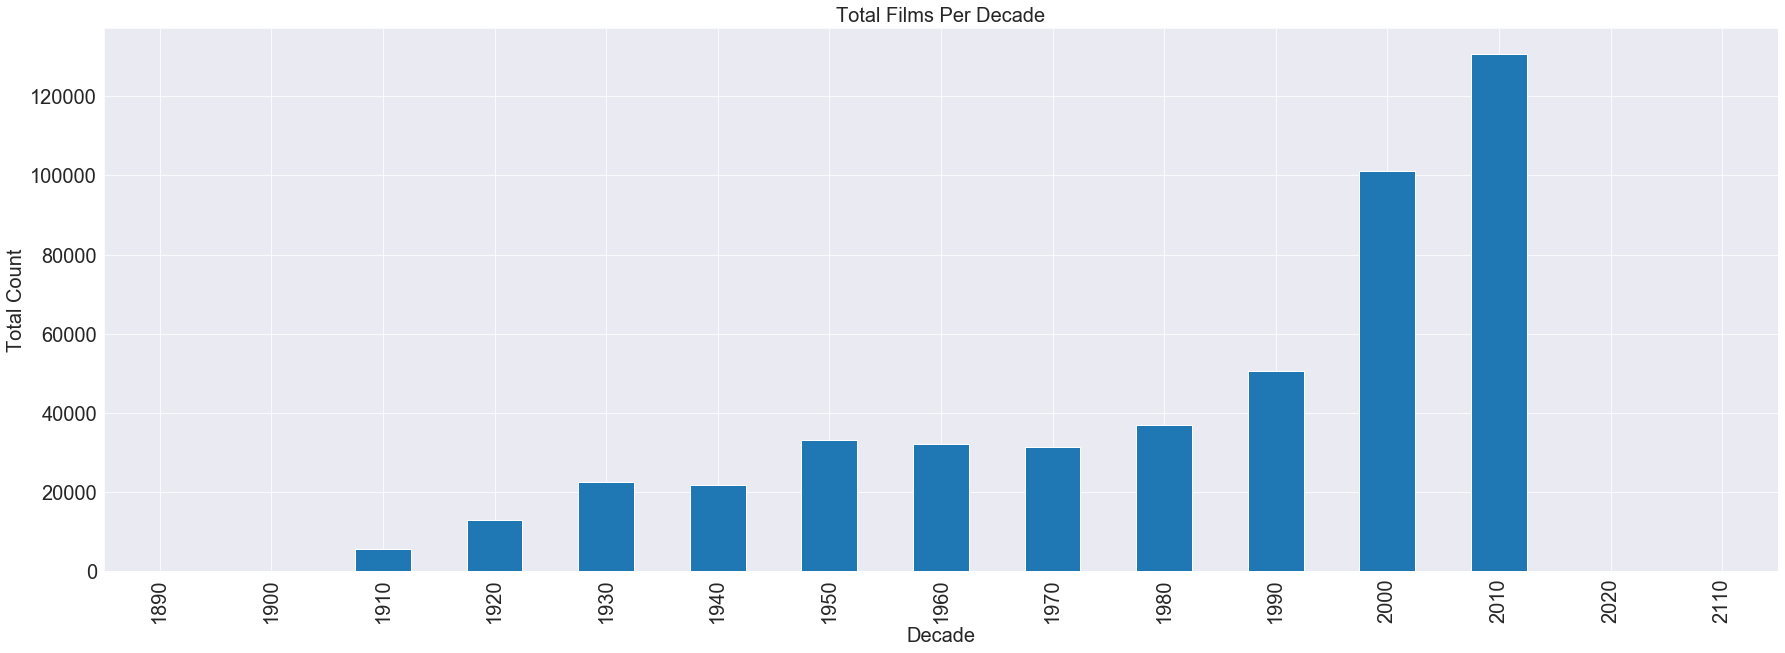

In [361]:
# plot result
total_films_by_decade.plot(kind='bar', figsize=(30,10), fontsize=20, )
plt.xlabel('Decade', fontsize=20)
plt.ylabel('Total Count', fontsize = 20)
plt.title('Total Films Per Decade', fontsize=20);

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [291]:
#A) What are the top 10 most common character names in movie history?
res = cast.groupby(by=['character']).size()
res.sort_values(ascending=False).head(10)

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
dtype: int64

In [309]:
#B) Who are the top 10 people most often credited as "Herself" in movie history?
herself_char = cast[cast.character == 'Herself']
herself_char.groupby(by=['name']).size().sort_values(ascending=False).head(10)

name
Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marilyn Monroe                6
Rekha                         6
dtype: int64

In [310]:
#C) Who are the top 10 people most often credited as "Himself" in movie history?
himself_char = cast[cast.character == 'Himself']
himself_char.groupby(by=['name']).size().sort_values(ascending=False).head(10)

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [332]:
#A) What are the top 10 most frequent roles that start with the word "Zombie"?

top_zombie = cast[cast.character.str.contains('^Zombie')]
res = top_zombie.groupby(top_zombie.character.str.strip())
res = res.size()
res.sort_values(ascending=False).head(10)

character
Zombie                         6269
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
dtype: int64

In [335]:
#B) What are the top 10 most frequent roles that start with the word "Police"?
top_police = cast[cast.character.str.contains('^Police')]
res = top_police.groupby(top_police.character.str.strip())
res = res.size()
res.sort_values(ascending=False).head(10)

character
Policeman              7031
Police Officer         4810
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  457
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

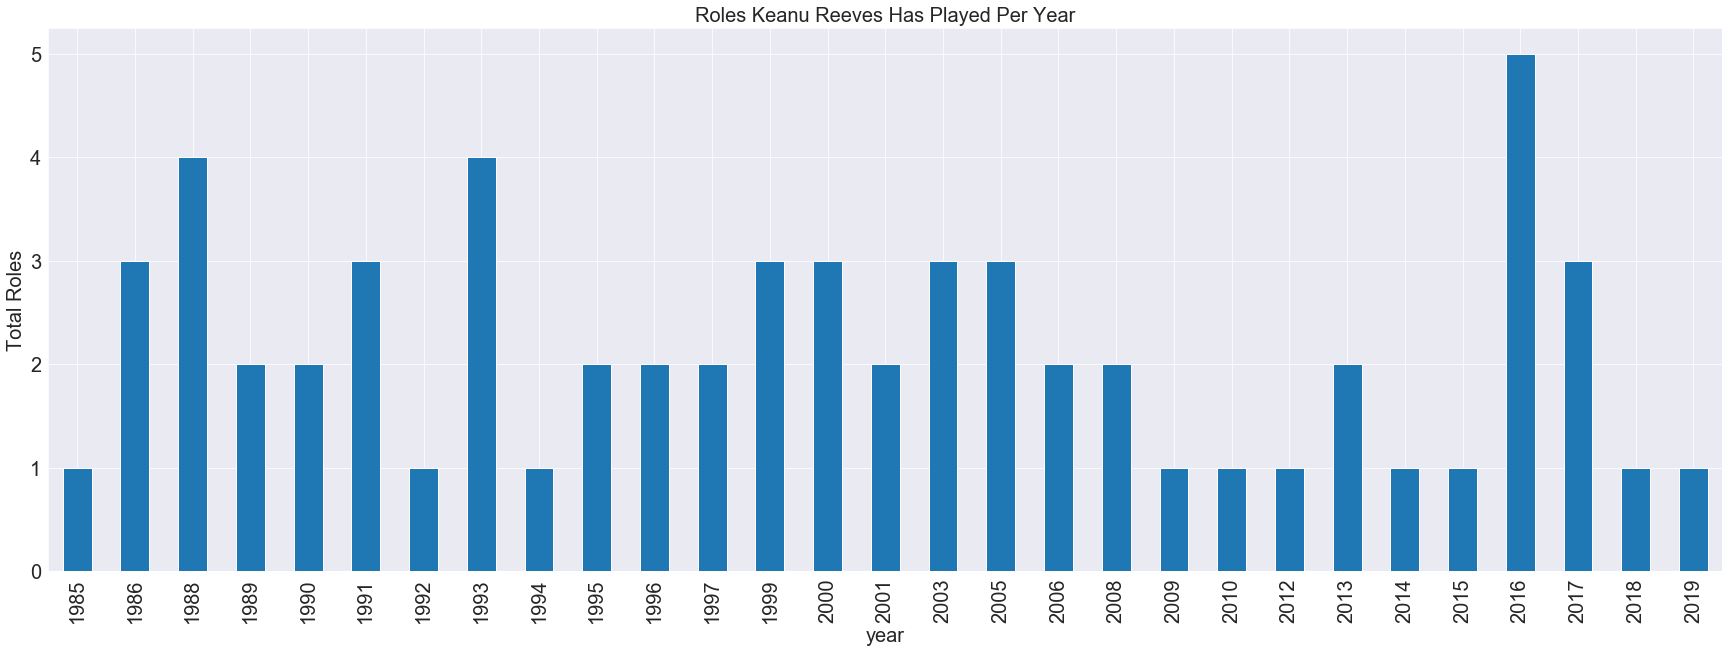

In [441]:
Keanu_roles = cast[cast.name == 'Keanu Reeves']
roles_group = Keanu_roles.groupby(by=['year']).size()
roles_group = roles_group.sort_index(ascending=True)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Roles', fontsize=20)
plt.title('Roles Keanu Reeves Has Played Per Year',fontsize=20)
roles_group.plot(kind='bar', figsize=(30,10), fontsize=20);
#roles_group.sort_values(ascending=False).shape

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


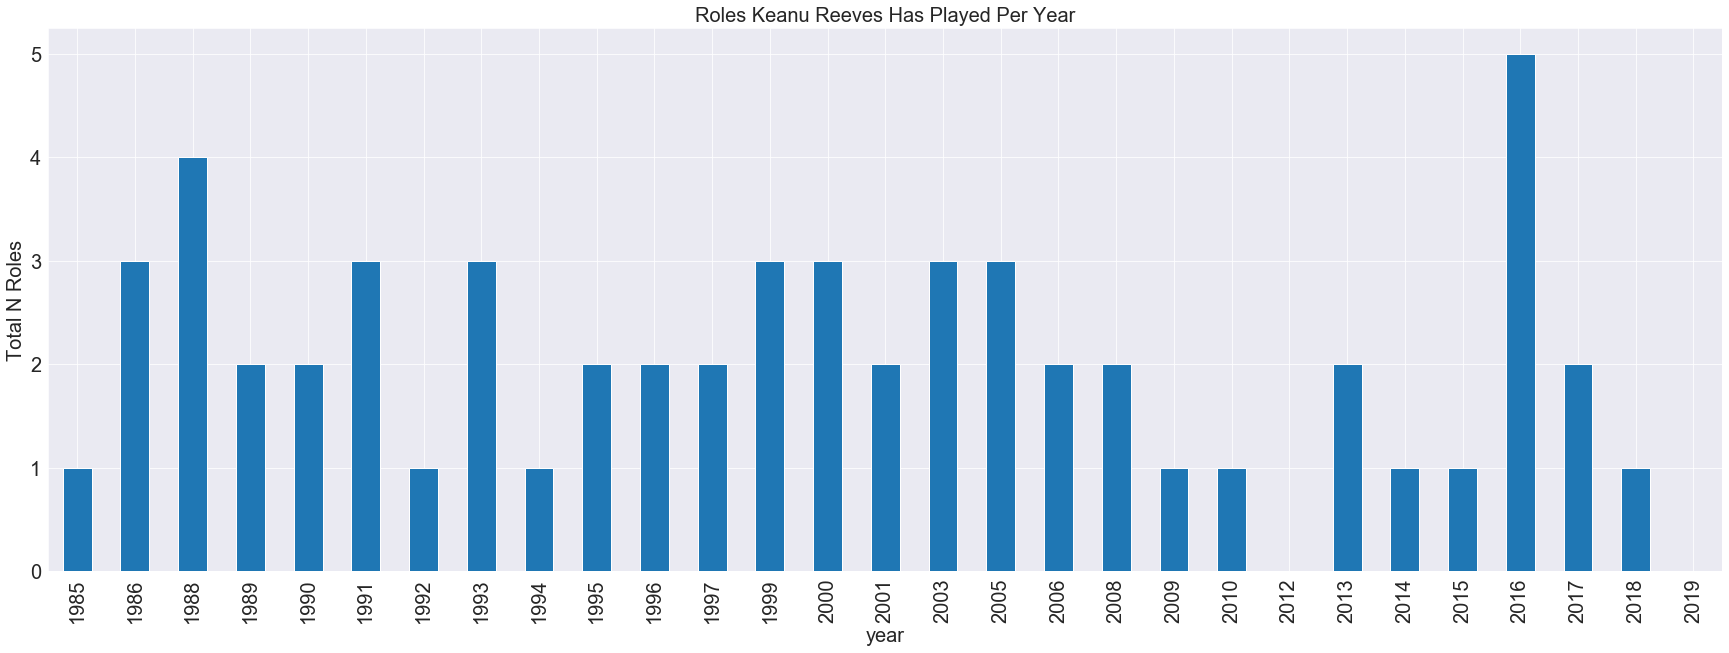

In [443]:
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total N Roles', fontsize=20)
plt.title('Roles Keanu Reeves Has Played Per Year',fontsize=20)
results = Keanu_roles.groupby(by=['year']).count().n.plot(kind='bar', figsize=(30,10), fontsize=20);

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

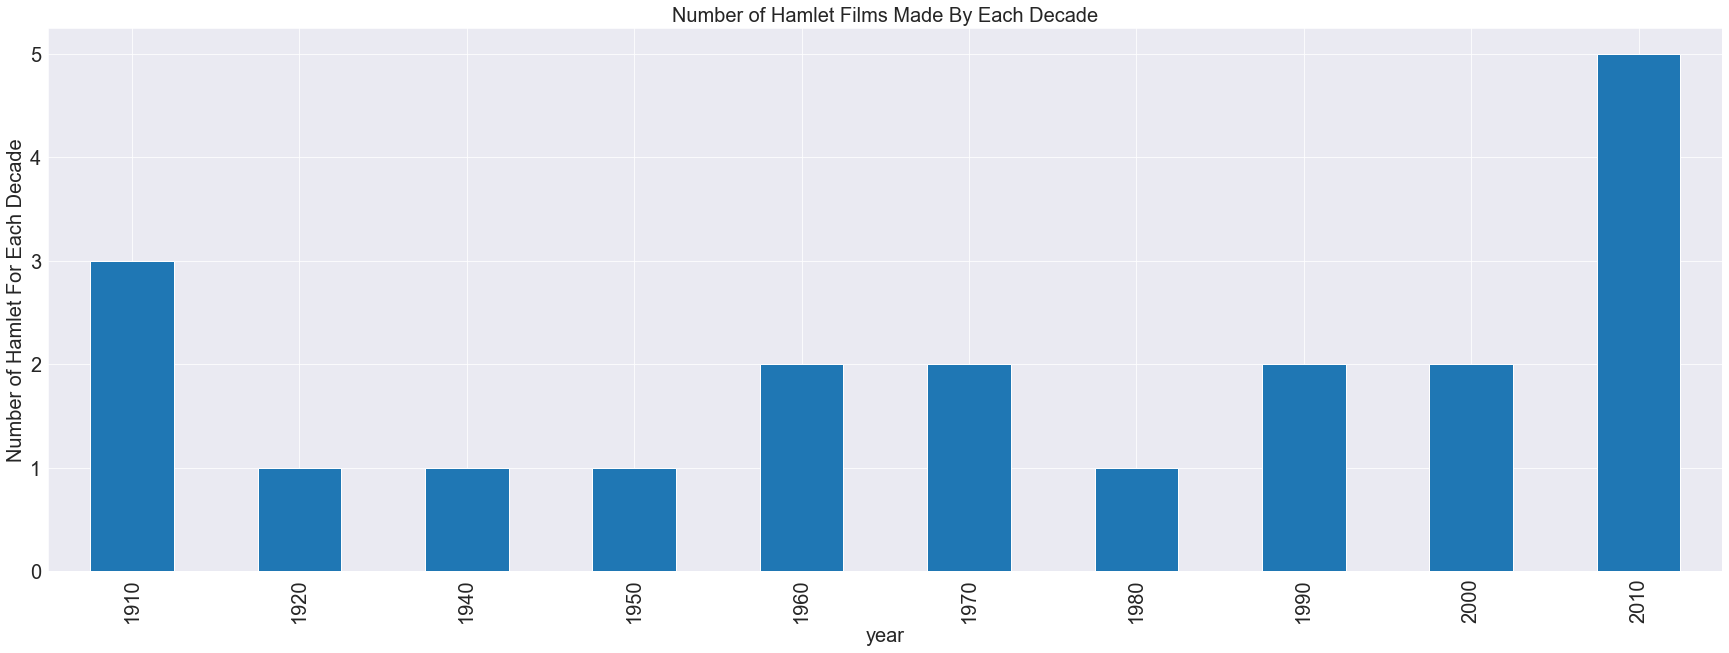

In [445]:
Hamlet_decades = movies[movies.title == 'Hamlet']

plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Hamlet For Each Decade', fontsize=20)
plt.title('Number of Hamlet Films Made By Each Decade',fontsize=20)

Hamlet_decades.groupby((Hamlet_decades.year//10)*10).size().plot(kind='bar', figsize=(30,10), fontsize=20);


### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [458]:
#A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?
# we assume leading role is when n=1

cast_n_1_1960s = cast[(cast.n == 1) & ( (cast.year >= 1960) & (cast.year <= 1969) )]
cast_n_1_1960s.groupby(by=['type']).size()

type
actor      8320
actress    3503
dtype: int64

In [460]:
#B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?
# we assume leading role is when n=1

cast_n_1_1960s = cast[(cast.n == 1) & ( (cast.year >= 2000) & (cast.year <= 2009) )]
cast_n_1_1960s.groupby(by=['type']).size()

type
actor      18557
actress     7787
dtype: int64

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [481]:
frank_oz = cast[cast.name == 'Frank Oz']
total_roles = frank_oz.groupby(['year']).count().character # count of characters
total_roles[total_roles > 1]

year
1979    8
1980    2
1981    8
1982    2
1983    3
1984    7
1985    4
1992    8
1996    4
1999    8
2005    2
2015    3
Name: character, dtype: int64

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [487]:
no_roles = frank_oz.groupby(['character']).size()
no_roles[no_roles > 1]

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

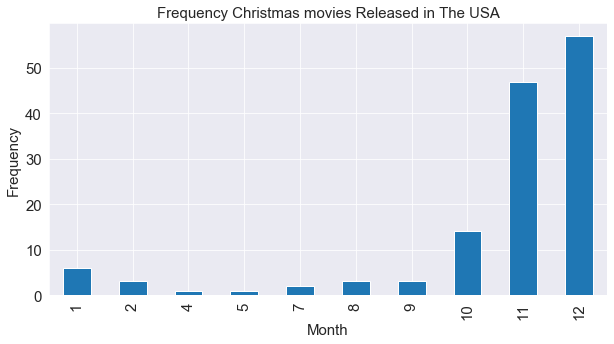

In [522]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]

plt.xlabel('Month', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency Christmas movies Released in The USA',fontsize=15)

christmas.date.dt.month.value_counts().sort_index().plot(kind='bar', figsize=(10,5), fontsize=15);

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

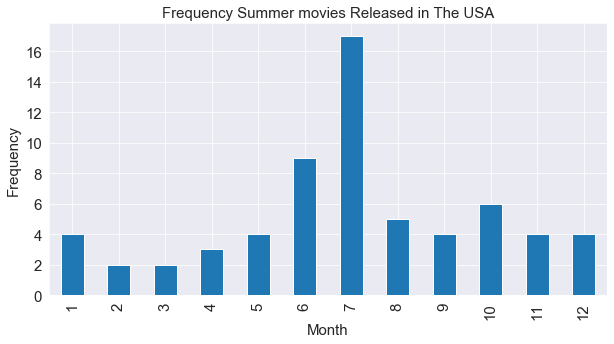

In [523]:
summer = release_dates[ (release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
plt.xlabel('Month', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency Summer movies Released in The USA',fontsize=15)

summer.date.dt.month.value_counts().sort_index().plot( kind='bar', figsize=(10,5), fontsize=15);

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

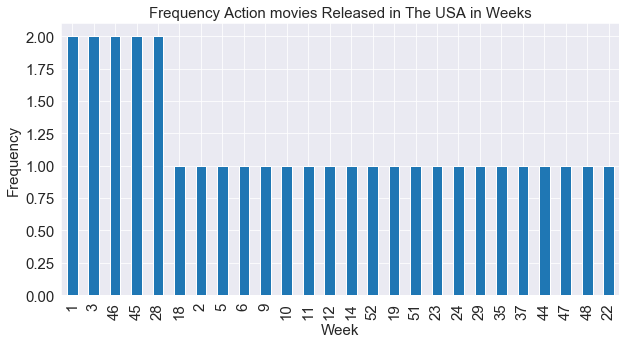

In [524]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]

plt.xlabel('Week', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency Action movies Released in The USA in Weeks',fontsize=15)

action.date.dt.week.sort_values().value_counts().plot(kind='bar', figsize=(10, 5), fontsize=15);

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [ ]:
# we assume leading role is when n=1
cast_release = cast.merge(release_dates, on=['title', 'year'])

In [546]:
Keanu_res = cast_release[(cast_release.name == 'Keanu Reeves') & (cast_release.n == 1) & (cast_release.country == 'USA')].sort_values(['date'], ascending=True)
Keanu_res

,title,year,name,type,character,n,country,date
16837127,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
8395767,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
2709676,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19
10232894,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,USA,1994-05-25
8629940,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,USA,1994-06-10
1803683,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,USA,1995-05-26
10458033,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,USA,1995-08-11
13350949,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,USA,1996-08-02
14609249,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,USA,1996-09-13
7805546,The Devil's Advocate,1997,Keanu Reeves,actor,Kevin Lomax,1.0,USA,1997-10-17


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

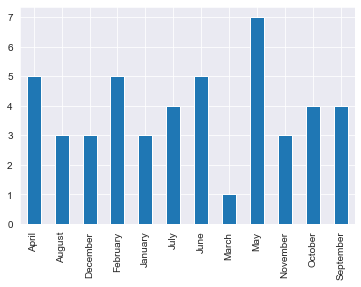

In [553]:
Keanu_res = cast_release[(cast_release.name == 'Keanu Reeves') & (cast_release.country == 'USA')].sort_values(['date'], ascending=True)

Keanu_res.date.dt.month_name().value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

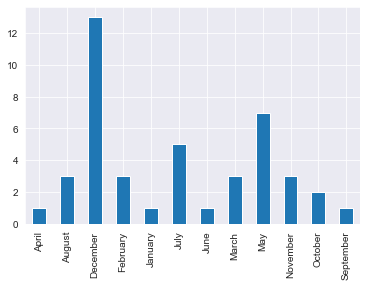

In [556]:
McKellen_res = cast_release[(cast_release.name.str.contains('McKellen')) & (cast_release.country == 'USA')].sort_values(['date'], ascending=True)

McKellen_res.date.dt.month_name().value_counts().sort_index().plot(kind='bar')